# Example 1: Computing the spectrum for a fixed vortex sector

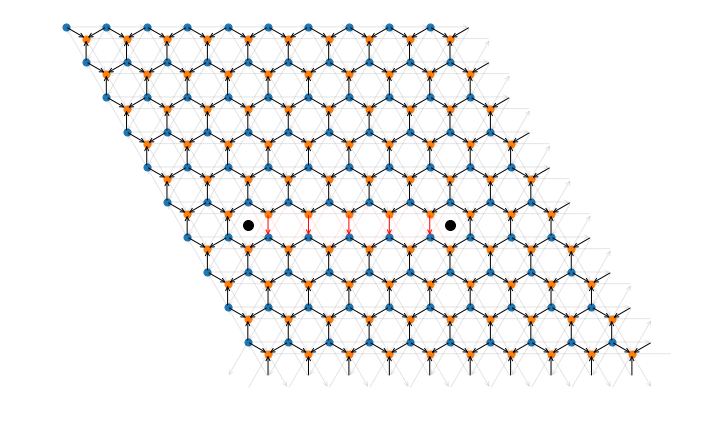

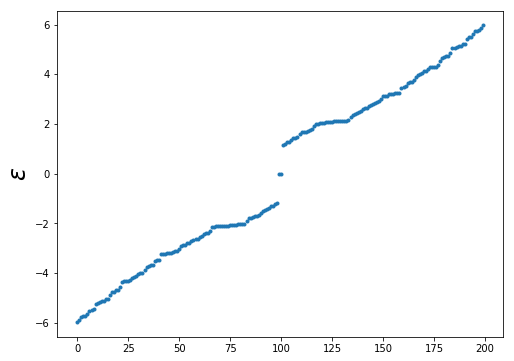

In [2]:
import numpy as np
from kithcmb import kitaevhoneycomb
from matplotlib import pyplot as plt
%matplotlib inline

# fix the parameter values and system size
J = [1,1,1]
K = 0.1
Lrows,Lcols = 10,10

# fix the values of the gauge fields. start from the no-vortex sector
ux = np.ones((Lrows,Lcols),dtype=np.int8)
uy = np.ones((Lrows,Lcols),dtype=np.int8)
uz = np.ones((Lrows,Lcols),dtype=np.int8)

# insert a pair of vortices by flipping a line of uz's
uz[Lrows//2,Lcols//4:3*Lcols//4] = -1

# initialise kitaevhoneycomb object
kh_sys = kitaevhoneycomb.kitaevhoneycomb(J=J,K=K,ux=ux,uy=uy,uz=uz) 

# (optionally) draw the system to see location of vortices, note this is slow
kh_sys.draw_system()

# obtain spectrum
spectrum = kh_sys.get_spectrum()

# plot the spectrum
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(spectrum,'.')
ax.set_ylabel(r'$\varepsilon$',fontsize=24)
plt.show()

In [15]:
%reset -f

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


# Example 2: Obtaining the correlation matrix for a fixed vortex sector

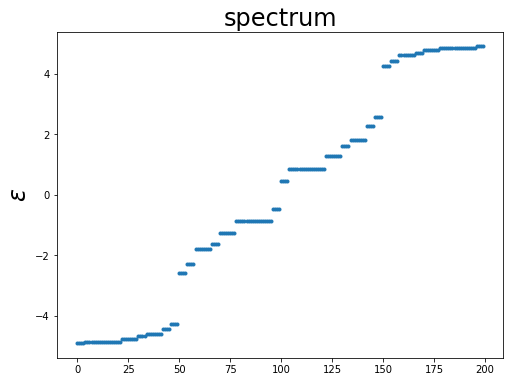


------------------------------
UNPROJECTED
------------------------------



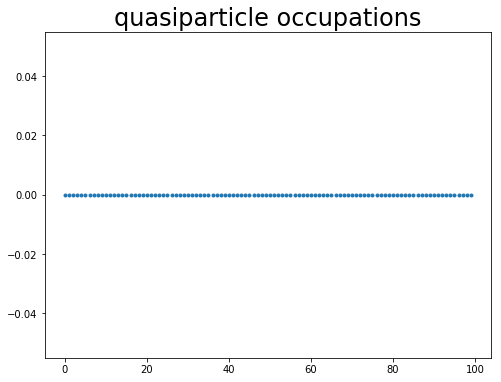

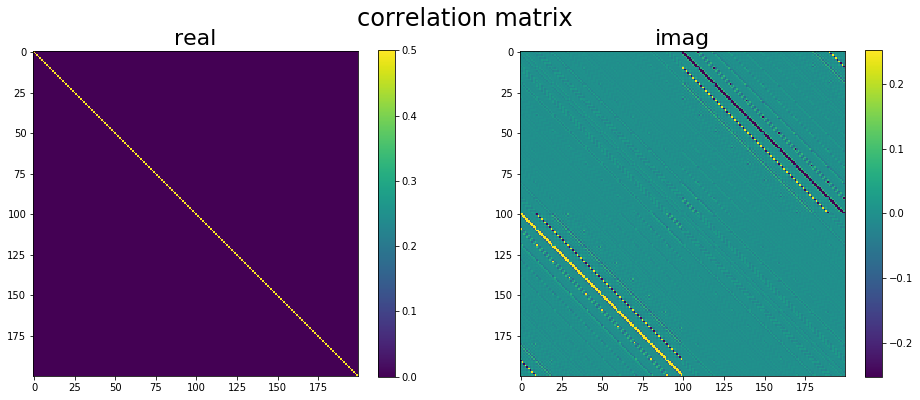


------------------------------
PROJECTED
------------------------------



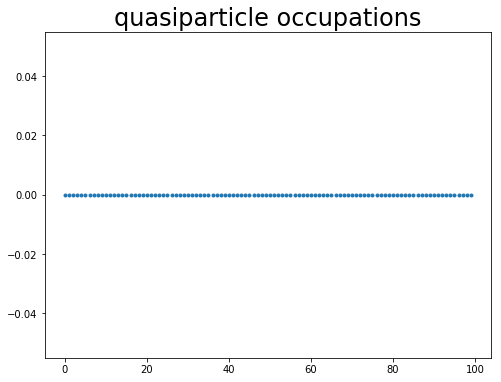

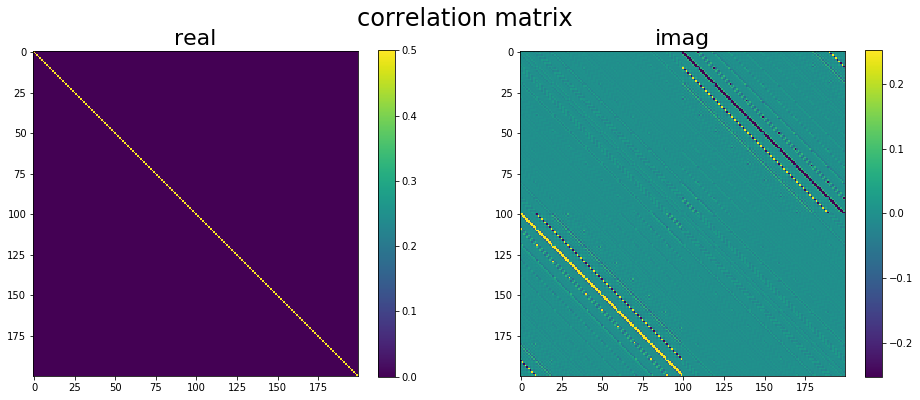

In [12]:
import numpy as np
from kithcmb import kitaevhoneycomb
from kithcmb import parityprojectedfermions
from matplotlib import pyplot as plt
%matplotlib inline

# temperature to compute correlation matrix at, set to zero
T = 0.

# fix the parameter values and system size
J = [1,1,1]
K = 0.1
Lrows,Lcols = 10,10

# fix the values of the gauge fields. start from the no-vortex sector
ux = np.ones((Lrows,Lcols),dtype=np.int8)
uy = np.ones((Lrows,Lcols),dtype=np.int8)
uz = np.ones((Lrows,Lcols),dtype=np.int8)

# go to the full vortex sector by flipping every second uz along rows
uz[:,::2] = -1

# initialise kitaevhoneycomb object
kh_sys = kitaevhoneycomb.kitaevhoneycomb(J=J,K=K,ux=ux,uy=uy,uz=uz) 

# (optionally) draw the system to see location of vortices, note this is slow
kh_sys.draw_system()

# obtain eigenvectors and eigenvalues of A matrix
D,U = kh_sys.get_diagonal_form()

# plot spectrum
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(np.diag(np.real(1j*D)),'.')
plt.title('spectrum',fontsize=24)
ax.set_ylabel(r'$\varepsilon$',fontsize=24)
plt.show()

# -------------
# version 1: obtain the correlation matrix WITHOUT parity constraint
# -------------
print('\n'+'-'*30+'\n'+'UNPROJECTED'+'\n'+'-'*30+'\n')
corr_mat,extras = parityprojectedfermions.get_unprojected_correlation_matrix(D,U,T)

# plot the quasipaticle occupations in extras
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(extras['quasi_occs'],'.')
plt.title('quasiparticle occupations',fontsize=24)
plt.show()

# plot real and imaginary part of correlation matrix
fig,(axl,axr) = plt.subplots(1,2,figsize=(16,6))
plt.suptitle('correlation matrix',fontsize=24)
im = axl.imshow(np.real(corr_mat))
plt.colorbar(im,ax=axl)
axl.set_title('real',fontsize=22)
im = axr.imshow(np.imag(corr_mat))
plt.colorbar(im,ax=axr)
axr.set_title('imag',fontsize=22)
plt.show()

# -------------
# version 2: obtain the correlation matrix WITH parity constraint
# -------------
print('\n'+'-'*30+'\n'+'PROJECTED'+'\n'+'-'*30+'\n')
desired_parity = parityprojectedfermions.get_desired_parity(ux=ux,uy=uy,uz=uz,U=U)
corr_mat,extras = parityprojectedfermions.get_projected_correlation_matrix(D,U,T,desired_parity)

# plot the quasipaticle occupations in extras
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(extras['quasi_occs'],'.')
plt.title('quasiparticle occupations',fontsize=24)
plt.show()

# plot real and imaginary part of correlation matrix
fig,(axl,axr) = plt.subplots(1,2,figsize=(16,6))
plt.suptitle('correlation matrix',fontsize=24)
im = axl.imshow(np.real(corr_mat))
plt.colorbar(im,ax=axl)
axl.set_title('real',fontsize=22)
im = axr.imshow(np.imag(corr_mat))
plt.colorbar(im,ax=axr)
axr.set_title('imag',fontsize=22)
plt.show()

In [11]:
%reset -f

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


# Example 3: Estimating thermal energy and vortex density for the spin model


------------------------------
T=0.001
------------------------------



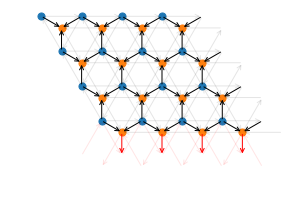

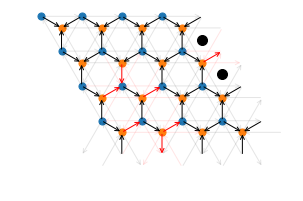

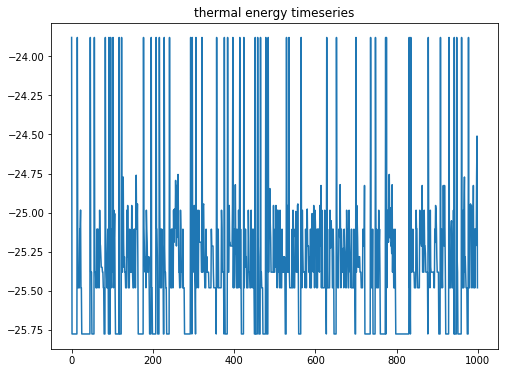

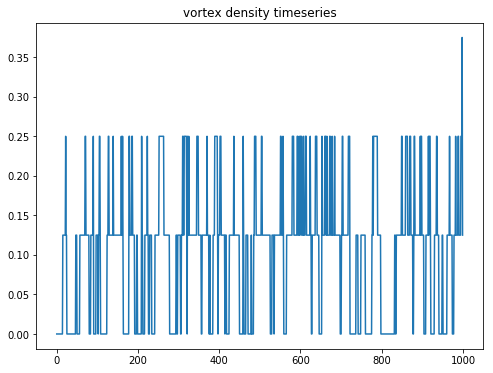


------------------------------
T=0.01
------------------------------



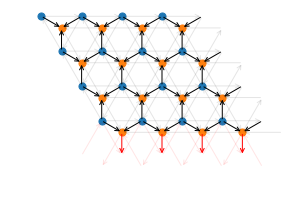

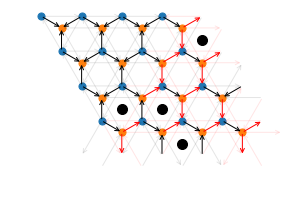

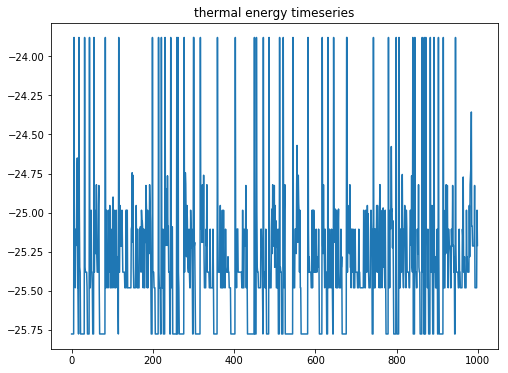

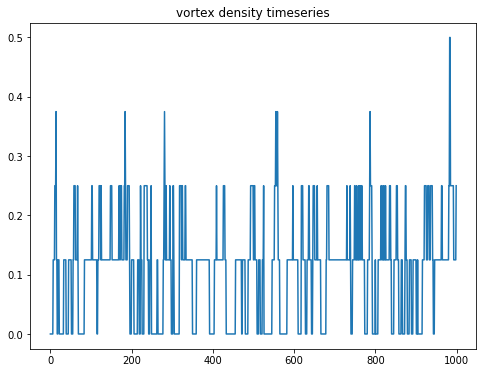


------------------------------
T=0.1
------------------------------



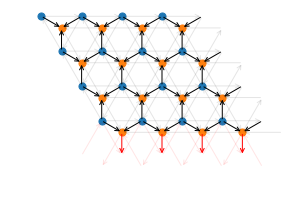

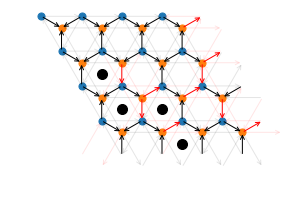

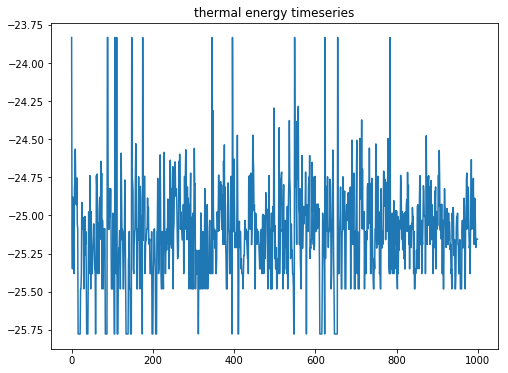

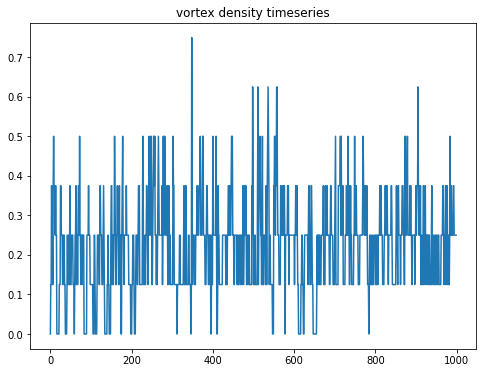


------------------------------
T=1
------------------------------



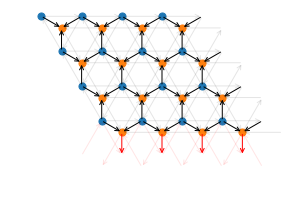

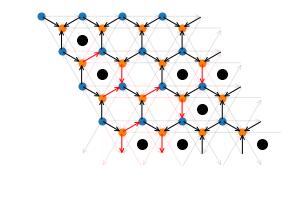

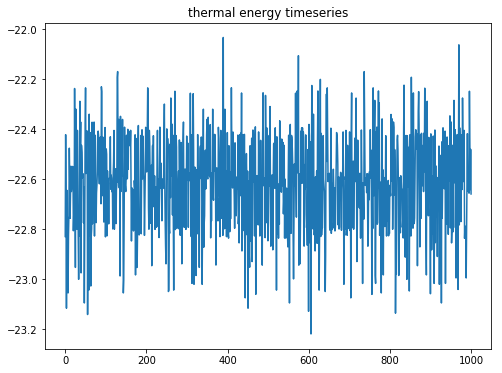

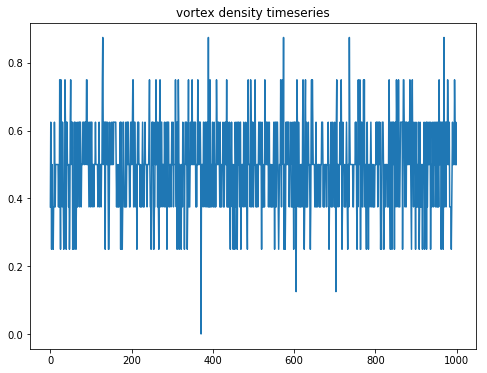


------------------------------
T=10
------------------------------



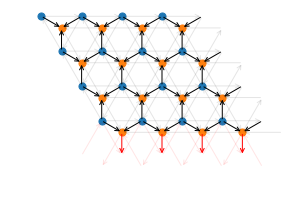

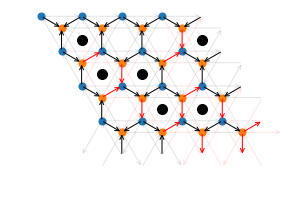

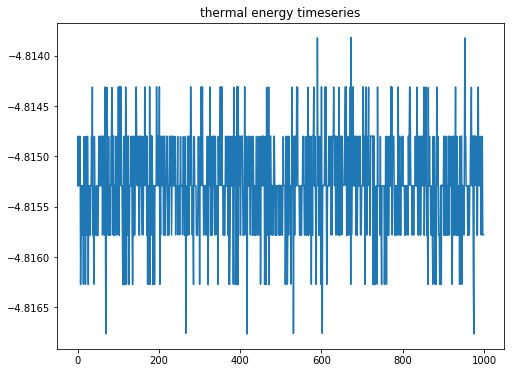

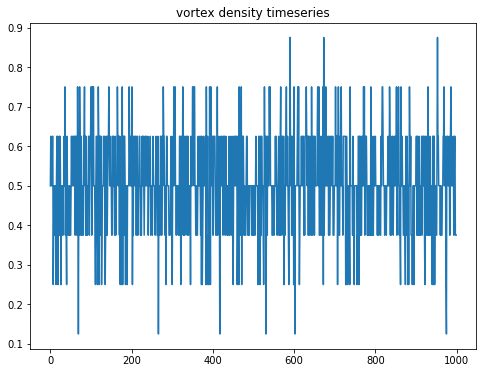


------------------------------
T=100
------------------------------



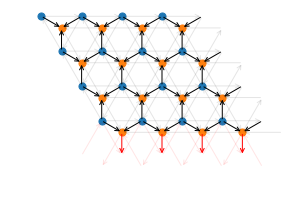

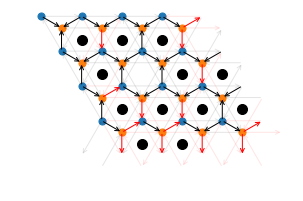

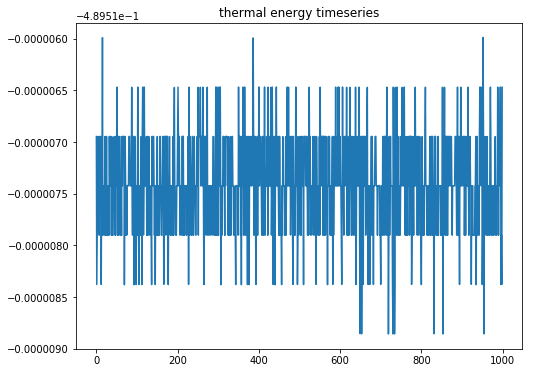

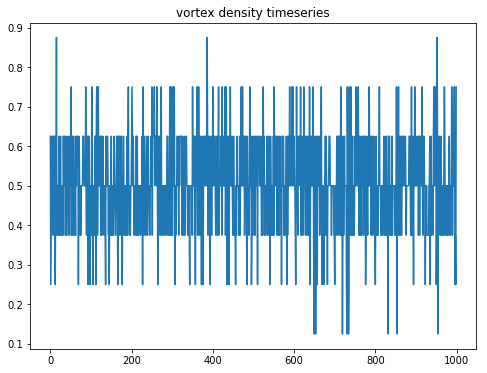


------------------------------
T=1e+03
------------------------------



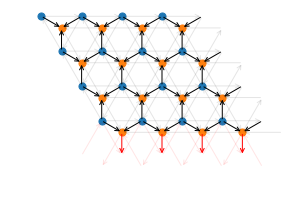

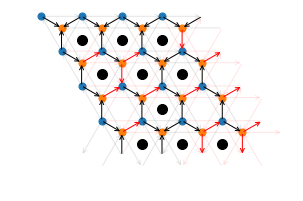

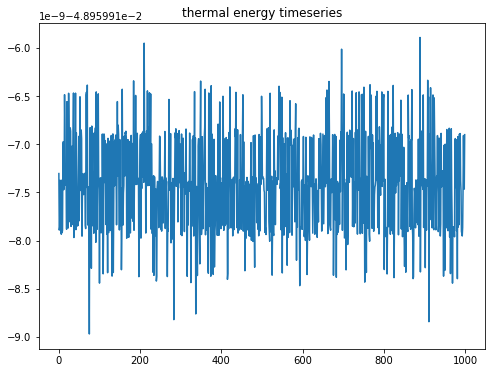

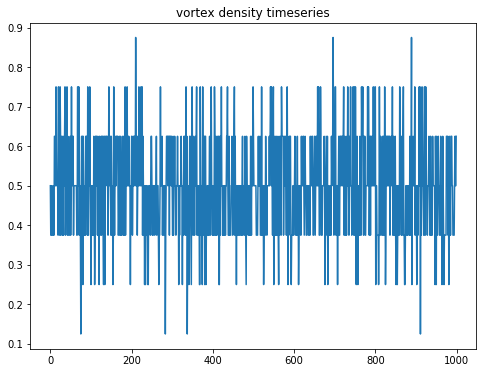

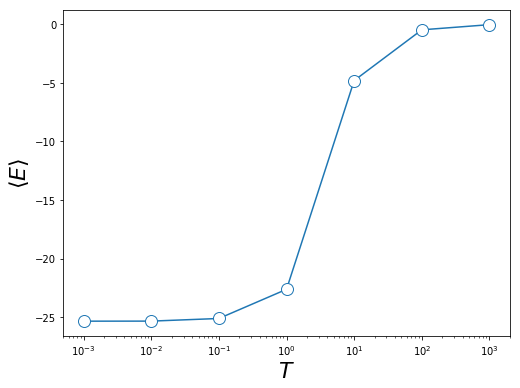

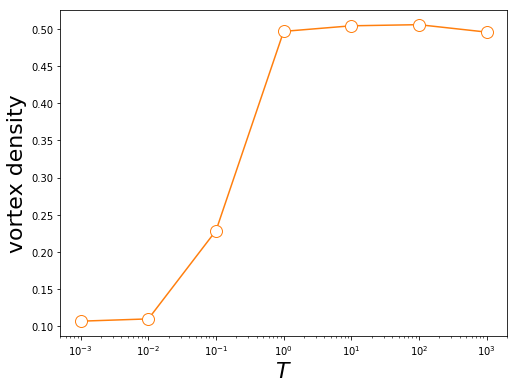

In [6]:
import numpy as np
from kithcmb import kitaevhoneycomb
from kithcmb import parityprojectedfermions
from kithcmb import montecarlo
from matplotlib import pyplot as plt
%matplotlib inline

# set of temperatures to compute thermal energy and vortex density at
T_vals = np.logspace(-3,3,7)
thermal_energies = np.zeros(T_vals.size)
vortex_densities = np.zeros(T_vals.size)

# number of rounds of Monte Carlo to carry out at each temperature 
mcmc_rounds = 1000

# fix the parameter values and system size
J = [1,1,1]
K = 0.1
Lrows,Lcols = 4,4

for Tidx,T in enumerate(T_vals):
    print('\n'+'-'*30+'\n'+'T='+"{0:.3g}".format(T)+'\n'+'-'*30+'\n')

    # initialise montecarlo object, this uses default options:
    # MC_step_type='vortex',change_topo_sector=True,project_fermions=True
    mcmc_obj = montecarlo.montecarlo(J=J,K=K)
    
    # store Monte Carlo timeseries of computed values
    thermal_energy_timeseries = np.zeros(mcmc_rounds)
    vortex_density_timeseries = np.zeros(mcmc_rounds)
    
    # start from a ground state, no-vortex sector with anti-periodic BC (fully periodic BC 
    # no-vortex sector projects to odd fermion parity and so is not a ground state)
    ux = np.ones((Lrows,Lcols),dtype=np.int8)
    uy = np.ones((Lrows,Lcols),dtype=np.int8)
    uz = np.ones((Lrows,Lcols),dtype=np.int8)
    uz[-1,:] = -1

    # initialise kitaevhoneycomb object
    kh_sys = kitaevhoneycomb.kitaevhoneycomb(J=J,K=K,ux=ux,uy=uy,uz=uz) 
    # (optionally) draw the initial state of the system to see the BC, note this is slow
    kh_sys.draw_system()
    
    # carry out Monte Carlo updates, each round is a 'sweep' of (Lrows*Lcols) Metropolis steps
    for i in range(mcmc_rounds):
        ux,uy,uz = mcmc_obj.metropolis_sweep(ux,uy,uz,T)
        
        # initialise a kitaevhoneycomb object with the current configuration and diagonalise
        kh_sys = kitaevhoneycomb.kitaevhoneycomb(J=J,K=K,ux=ux,uy=uy,uz=uz) 
        Sigma,Q = kh_sys.get_normal_form()
        spectrum = np.sort(np.sum(Sigma,axis=0))
        
        # get current value of vortex density and thermal energy
        desired_parity = parityprojectedfermions.get_desired_parity(ux=ux,uy=uy,uz=uz,Q=Q)
        thermal_energy_timeseries[i],extras = parityprojectedfermions.get_projected_thermal_energy(spectrum,T,desired_parity)
        vortex_density_timeseries[i] = np.sum(0.5*(1.-kh_sys.vortices))/ux.size
        
    # (optionally) draw very final state of the system
    kh_sys.draw_system()
        
    # plot timeseries
    fig,ax = plt.subplots(figsize=(8,6))
    plt.title('thermal energy timeseries')
    ax.plot(thermal_energy_timeseries,'-')
    plt.show()
    fig,ax = plt.subplots(figsize=(8,6))
    plt.title('vortex density timeseries')
    ax.plot(vortex_density_timeseries,'-')
    plt.show()
    
    # allow for burn-in and compute averages with last 90% of timeseries
    thermal_energies[Tidx] = np.mean(thermal_energy_timeseries[mcmc_rounds//10:])
    vortex_densities[Tidx] = np.mean(vortex_density_timeseries[mcmc_rounds//10:])
 
#
# plot average thermal energies and vortex densities as functions of temperature
#
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(T_vals,thermal_energies,'o-',markerfacecolor='w',markersize=12)
ax.set_xscale('log')
ax.set_xlabel(r'$T$',fontsize=22)
ax.set_ylabel(r'$\langle E \rangle$',fontsize=22)
plt.show()

fig,ax = plt.subplots(figsize=(8,6))
ax.plot(T_vals,vortex_densities,'o-',markerfacecolor='w',markersize=12,color='C1')
ax.set_xscale('log')
ax.set_xlabel(r'$T$',fontsize=22)
ax.set_ylabel('vortex density',fontsize=22)
plt.show()

In [ ]:
%reset -f